<a href="https://colab.research.google.com/github/crivilla/emparejamiento_datos_obsevacionales/blob/main/generacion_datos_sinteticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GENERACIÓN DE DATOS SINTÉTICOS (Synthetic data generation)** 

Se desarrolla el proceso de generación de un dataset sintético a partir de distribuciones conocidas. 

Conlleva un estudio previo sobre las prevalencias de las enfermedades específicas en la población que se quiere representar.

In [1]:
#Importación de librerías útiles

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

**Generación de las distribuciones**

In [3]:
#Generación de una distribución aleatoria - Ejemplo para la variable EDAD

edad_dist= np.random.randint(low=50, high=80, size=1400, dtype=int)

In [4]:
#Generación de distribuciones normales (o gaussianas) - Variables presión arterial sistólica (PAS) y diastólica (PAD)

pas_normal_dist = np.random.normal(loc=137, scale=14, size=1400) ## Parámetros de la función: np.random.normal(mean, std dev, size)
pad_normal_dist = np.random.normal(loc=80, scale=9, size=1400) 
# framing_normal_dist = np.random.normal(loc=80, scale=9, size=1400) #La distribución de la variable PUNTAJE DE RCV FRAMINGHAM se presupone normal, pero ante la duda, no se incluye

In [5]:
#Generación de distribuciones binomiales

sexo_binomial_dist = np.random.binomial(1,0.6,1400) # Parámetros de la función: np.random.binomial(max,prob,size)
ic_binomial_dist = np.random.binomial(1,0.03,1400) 
acv_binomial_dist = np.random.binomial(1,0.05,1400) 
sca_binomial_dist = np.random.binomial(1,0.05,1400) 
iam_k75_binomial_dist = np.random.binomial(1,0.05,1400) 
# revasc_binomial_dist = np.random.binomial(1,0.6,1400) #De la variable REVASCULARIZACIÓN no se conoce la prevalencia sobre la población de estudio, no se incluye
dm_binomial_dist = np.random.binomial(1,0.17,1400) 
ir_binomial_dist = np.random.binomial(1,0.27,1400) 


In [6]:
#Generación de distribuciones gamma y exponencial (no aplican para ninguna de las variables de interés de este estudio, se añaden a modo informativo)

# gamma_dist = np.random.gamma(shape=3, scale=1, size=1000)
# exp_dist = np.random.exponential(scale=4, size=1000)

**Visualización de las distribuciones resultantes**

(array([137., 154., 151., 128., 158., 125., 138., 123., 144., 142.]),
 array([50. , 52.9, 55.8, 58.7, 61.6, 64.5, 67.4, 70.3, 73.2, 76.1, 79. ]),
 <BarContainer object of 10 artists>)

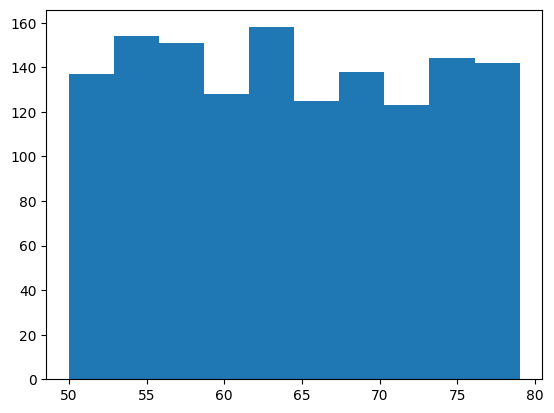

In [7]:
# Visualización de la distribución correspondiente a la variable EDAD

plt.hist(edad_dist)

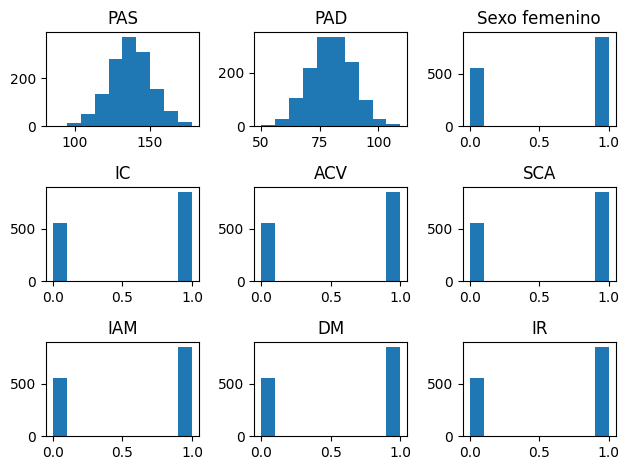

In [9]:
# Visualización de múltiples distribuciones mediante histogramas

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3)

ax1.hist(pas_normal_dist)
ax1.set_title('PAS')
ax2.hist(pad_normal_dist)
ax2.set_title('PAD')

ax3.hist(sexo_binomial_dist)
ax3.set_title('Sexo femenino')
ax4.hist(sexo_binomial_dist)
ax4.set_title('IC')
ax5.hist(sexo_binomial_dist)
ax5.set_title('ACV')
ax6.hist(sexo_binomial_dist)
ax6.set_title('SCA')
ax7.hist(sexo_binomial_dist)
ax7.set_title('IAM')
ax8.hist(sexo_binomial_dist)
ax8.set_title('DM')
ax9.hist(sexo_binomial_dist)
ax9.set_title('IR')

fig.tight_layout()
plt.show()



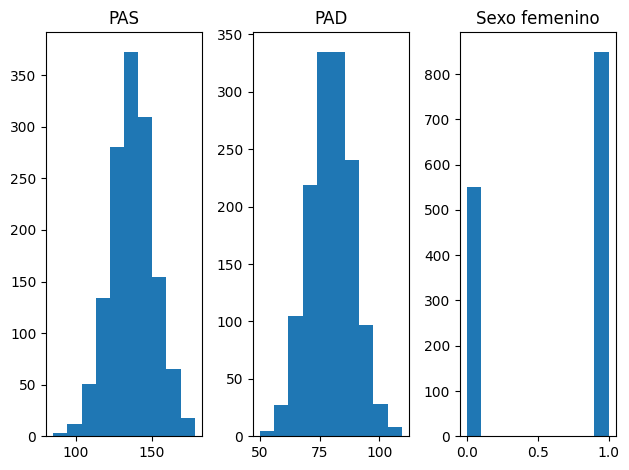

In [8]:
#Histogramas ampliados - Exploración más detallada de las distribuciones
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.hist(pas_normal_dist)
ax1.set_title('PAS')
ax2.hist(pad_normal_dist)
ax2.set_title('PAD')
ax3.hist(sexo_binomial_dist)
ax3.set_title('Sexo femenino')
#ax4.hist(sexo_binomial_dist) # Variamos el número de gráficos a mostrar
#ax4.set_title('IC')

fig.tight_layout()


**Generación de los conjuntos de datos**

Las secciones anteriores son a modo explicativo. 

En las siguientes secciones de código se generan las distribuciones, se asignan al nombre de la variable (o columna) correspondiente y se incluyen en la función correspondiente para formar el conjunto de datos.

In [10]:
#Importación de la librería necesaria
from pandas.core.arrays import integer

# GRUPO INTERVENCIÓN (n=1400)

edad = np.random.randint(low=50, high=80, size=1400, dtype=int)
sexo = np.random.binomial(1,0.6,1400)
ic = np.random.binomial(1,0.03,1400)
acv =  np.random.binomial(1,0.05,1400)
sca = np.random.binomial(1,0.05,1400)
iam_k75= np.random.binomial(1,0.05,1400)
dm = np.random.binomial(1,0.17,1400)
ir = np.random.binomial(1,0.27,1400)
pas= np.round(np.random.normal(loc=125, scale=14, size=1400),2) 
pad = np.round(np.random.normal(loc=70, scale=9, size=1400),2) #np.round() #Redondea un array al número de decimales especificado
interv = np.full(shape=1400, fill_value= 1,dtype=np.int8) #Asigna el valor 1 en la variable INTERVENCIÓN para todos los suejtos de este conjunto

sujetosSint_interv_ndarray=np.column_stack((edad, sexo, ic, acv, sca, iam_k75, dm, ir, pas, pad, interv))

In [11]:
sujetosSint_interv_df = pd.DataFrame(sujetosSint_interv_ndarray, columns = ['edad','sexo','ic', 'acv','sca','iam_k75','dm','ir','pas', 'pad','interv'])

In [12]:
sujetosSint_interv_df.head()

,edad,sexo,ic,acv,sca,iam_k75,dm,ir,pas,pad,interv
0,67.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,147.10,63.61,1.0
1,53.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,132.76,66.40,1.0
2,50.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,123.78,69.33,1.0
3,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,158.09,76.96,1.0
4,79.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,137.38,64.45,1.0


Exportación del dataset:

In [13]:
#Importación de librería necesaria
from google.colab import files

In [14]:
sujetosSint_interv_df.to_excel('sujetosSint_interv.xlsx')
files.download('sujetosSint_interv.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# GRUPO CONTROL (n=700.000)

edad = np.random.randint(low=50, high=80, size=700000, dtype=int)
sexo = np.random.binomial(1,0.6,700000)
ic = np.random.binomial(1,0.03,700000)
acv =  np.random.binomial(1,0.05,700000)
sca = np.random.binomial(1,0.05,700000)
iam_k75= np.random.binomial(1,0.05,700000)
dm= np.random.binomial(1,0.17,700000)
ir = np.random.binomial(1,0.27,700000)
pas= np.round(np.random.normal(loc=137, scale=14, size=700000),2) 
pad = np.round(np.random.normal(loc=80, scale=9, size=700000),2) 
interv = np.full(700000, 0)

sujetosSint_ctrl_ndarray=np.column_stack((edad,sexo,ic, acv,sca,iam_k75,dm,ir,pas,pad,interv))

In [16]:
sujetosSint_ctrl_df = pd.DataFrame(sujetosSint_ctrl_ndarray, columns = ['edad','sexo','ic', 'acv','sca','iam_k75','dm','ir','pas', 'pad','interv'])

In [17]:
sujetosSint_ctrl_df.head()

,edad,sexo,ic,acv,sca,iam_k75,dm,ir,pas,pad,interv
0,55.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,124.05,77.54,0.0
1,71.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,148.22,76.98,0.0
2,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,108.97,91.59,0.0
3,66.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,138.41,81.86,0.0
4,63.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.96,89.34,0.0


In [18]:
sujetosSint_ctrl_df.to_excel('sujetosSint_ctrl_n700000.xlsx')
files.download('sujetosSint_ctrl_n700000.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>